# Stock Price Prediction using RNN

**Recurrent neural networks (RNN)
LSTM - Long short-time Memory**


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

In [57]:
df = pd.read_csv('google.csv')
df.head()

df = df['Close'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(2768, 1)
(2214, 1)
(604, 1)


In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.18563198],
       [0.1845002 ],
       [0.19020028],
       [0.1849255 ],
       [0.19175731]])

In [59]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.92208988],
       [0.9260044 ],
       [0.93009143],
       [0.92988437],
       [0.93765805]])

In [60]:
def create_dataset(df):
    x = []
    y = []
    for i in range(100, df.shape[0]):
        x.append(df[i-100:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [61]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.92208988, 0.9260044 , 0.93009143, 0.92988437, 0.93765805,
        0.93960498, 0.94123429, 0.94690925, 0.95460016, 0.95627093,
        0.95424115, 0.96139354, 0.96679242, 0.97174935, 0.9705067 ,
        0.97129375, 0.96757947, 0.96846318, 0.96008188, 0.97669254,
        0.97032719, 0.96818701, 0.96639202, 0.97209454, 0.97687205,
        0.9814424 , 0.98775255, 0.99091449, 0.99102497, 0.99320662,
        0.99538826, 1.        , 0.99486356, 0.97009248, 0.96889122,
        0.95230812, 0.94795865, 0.954973  , 0.95691985, 0.97140415,
        0.97152846, 0.96884976, 0.98126289, 0.97576744, 0.97140415,
        0.96653007, 0.96209775, 0.9621806 , 0.96027512, 0.96161452,
        0.96056511, 0.97935742, 0.97887418, 0.98079348, 0.98554334,
        0.9876697 , 1.01469145, 1.027864  , 1.02707695, 1.03055652,
        1.07434088, 1.08346777, 1.08881136, 1.10344752, 1.10982669,
        1.10357183, 1.11347195, 1.1105309 , 1.10585014, 1.10836307,
        1.11059992, 1.11731054, 1.1254847 , 1.09

In [62]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [63]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [64]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=100, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/100
2164/2164 [==============================] - 14s 6ms/step - loss: 0.0163
Epoch 2/100
2164/2164 [==============================] - 10s 5ms/step - loss: 0.0024
Epoch 3/100
2164/2164 [==============================] - 11s 5ms/step - loss: 0.0023
Epoch 4/100
2164/2164 [==============================] - 11s 5ms/step - loss: 0.0021
Epoch 5/100
2164/2164 [==============================] - 10s 4ms/step - loss: 0.0023
Epoch 6/100
2164/2164 [==============================] - 9s 4ms/step - loss: 0.0018
Epoch 7/100
2164/2164 [==============================] - 9s 4ms/step - loss: 0.0021
Epoch 8/100
2164/2164 [==============================] - 9s 4ms/step - loss: 0.0019
Epoch 9/100
2164/2164 [==============================] - 10s 4ms/step - loss: 0.0017
Epoch 10/100
2164/2164 [==============================] - 9s 4ms/step - loss: 0.0017
Epoch 11/100
2164/2164 [==============================] - 9s 4ms/step - loss: 0.0020
Epoch 12/100
2164/2164 [==============================] - 9s 4ms/ste

In [53]:
model = load_model('stock_prediction.h5')

**RESULTS**

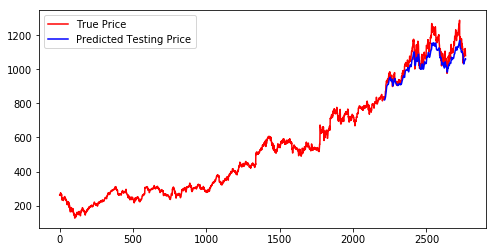

In [54]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

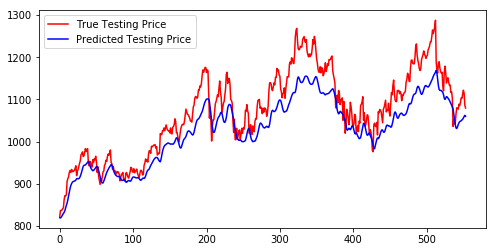

In [55]:

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()